In [1]:
import numpy as np
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

cmap = mpl.cm.get_cmap('coolwarm')

In [2]:
df = pd.read_csv('dataset_cleaned.csv')

# Data: 57,291
# Sample:


,text,label,name
0,"In recent years, technology has had a profoun...",1,fake
1,Should students participate in an extracurricu...,0,real


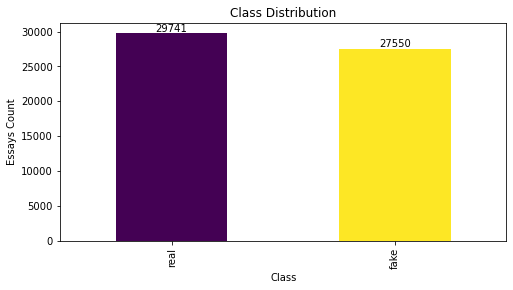

In [3]:
# Class names and their corresponding labels
class_names = ["real", "fake"]
num_classes = len(class_names)
class_labels = list(range(num_classes))

# Map numeric labels to class names
df['name'] = df['label'].map(dict(zip(class_labels, class_names)))

# Display information about the data
print("# Data: {:,}".format(len(df)))
print("# Sample:")
display(df.head(2))

# Show distribution of labels using a bar plot
plt.figure(figsize=(8, 4))
cmap = get_cmap('viridis')  # Choose a color map
colors = [cmap(i) for i in np.linspace(0, 1, num_classes)]

# Plot
value_counts = df['name'].value_counts()
bars = value_counts.plot.bar(color=colors)
plt.xlabel("Class")
plt.ylabel("Essays Count")
plt.title("Class Distribution")

# Adding counts above bars
for i, value in enumerate(value_counts):
    bars.text(i, value, f'{value}', ha='center', va='bottom')

plt.show()

In [4]:
sub_df = df
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def clean_message(message):
    # Convert to lowercase and remove URLs
    message = message.lower()
    message = re.sub('http\S+|www\S+', '', message)

    return message


# Preprocess the 'text' column
sub_df['cleaned_text'] = sub_df['text'].apply(clean_message)

# Display the DataFrame to see the changes
print(sub_df[['text', 'cleaned_text']])

                                                    text  \
0       In recent years, technology has had a profoun...   
1      Should students participate in an extracurricu...   
2      The electoral college is a symbol of mockery a...   
3      This is why I think the principle should allow...   
4      I strongly believe that meditation and mindful...   
...                                                  ...   
57286  \nBecoming a surgeon requires a great deal of ...   
57287  \nSchools should offer an after school homewor...   
57288  \nIt’s human nature to be afraid to make mista...   
57289  \nOne of the main debates of 2020 for many stu...   
57290  \nThe implementation of a curfew for teenagers...   

                                            cleaned_text  
0       in recent years, technology has had a profoun...  
1      should students participate in an extracurricu...  
2      the electoral college is a symbol of mockery a...  
3      this is why i think the principle sh

In [5]:
#pip install textstat

In [6]:
import pandas as pd
import numpy as np
import nltk
import gensim
import spacy
import textstat
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from sklearn.preprocessing import StandardScaler
from transformers import BertTokenizer, BertModel

# Load your dataframe
# sub_df = pd.read_csv('your_file.csv')  # Assuming you have a file to load from

# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load spacy model for syntax analysis
nlp = spacy.load("en_core_web_sm")

# Function to calculate sentence length
def sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    return np.mean([len(nltk.word_tokenize(sent)) for sent in sentences])

# Function to calculate vocabulary richness
def vocabulary_richness(text):
    words = nltk.word_tokenize(text)
    return len(set(words)) / len(words) if words else 0

# Function to calculate readability score
def readability_score(text):
    return textstat.flesch_reading_ease(text)

# Function to extract n-grams
def extract_ngrams(text, num):
    n_grams = ngrams(nltk.word_tokenize(text), num)
    return [' '.join(grams) for grams in n_grams]

# # Function to calculate syntax features
# def syntax_features(text):
#     doc = nlp(text)
#     pos_tags = [token.pos_ for token in doc]
#     return pos_tags

# Feature extraction
sub_df['sentence_length'] = sub_df['cleaned_text'].apply(sentence_length)
sub_df['vocab_richness'] = sub_df['cleaned_text'].apply(vocabulary_richness)
sub_df['readability'] = sub_df['cleaned_text'].apply(readability_score)
# # For n-grams, you'll have to decide how to integrate them into your model
# sub_df['syntax'] = sub_df['cleaned_text'].apply(syntax_features)

# Feature Scaling
scaler = StandardScaler()
sub_df[['sentence_length', 'vocab_richness', 'readability']] = scaler.fit_transform(sub_df[['sentence_length', 'vocab_richness', 'readability']])

# Word Embeddings (example with Word2Vec, you can replace with GloVe or BERT)
# Assuming you have pre-trained Word2Vec embeddings loaded into 'word2vec_model'
def document_vector(text, model):
    words = nltk.word_tokenize(text)
    word_vectors = [model[word] for word in words if word in model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)


[nltk_data] Downloading package punkt to /home/rayapudi.s/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rayapudi.s/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


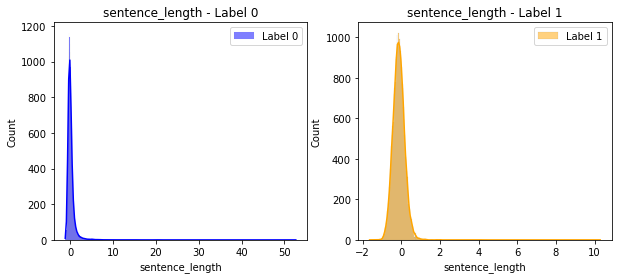

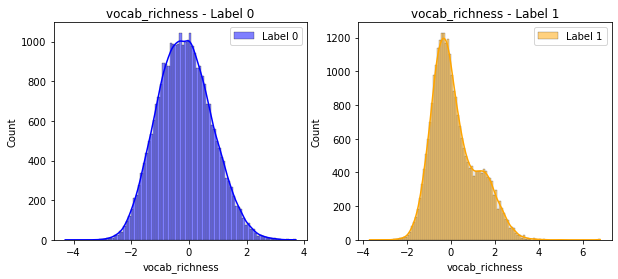

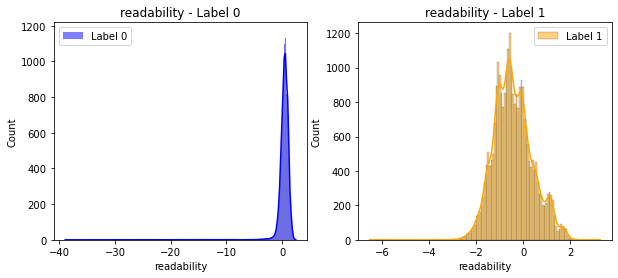

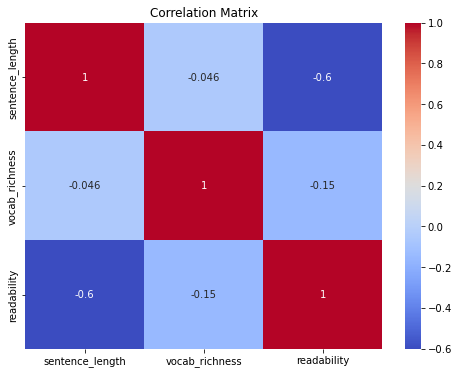

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
# Replace this with your actual DataFrame

# EDA: Distribution of features by label
features = ['sentence_length', 'vocab_richness', 'readability']

for feature in features:
    plt.figure(figsize=(10, 4))

    # Separate plots for label 0 and label 1
    plt.subplot(1, 2, 1)
    sns.histplot(sub_df[sub_df['label'] == 0][feature], kde=True, color='blue', label='Label 0')
    plt.title(f'{feature} - Label 0')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.histplot(sub_df[sub_df['label'] == 1][feature], kde=True, color='orange', label='Label 1')
    plt.title(f'{feature} - Label 1')
    plt.legend()

    plt.show()

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(sub_df[['sentence_length', 'vocab_richness', 'readability']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
sub_df.columns

Index(['text', 'label', 'name', 'cleaned_text', 'sentence_length',
       'vocab_richness', 'readability'],
      dtype='object')

In [9]:
import spacy

# Load SpaCy's English-language models
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities and count by type
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents]
    return pd.Series(entities).value_counts().to_dict()

# Assuming 'text' is the column in your DataFrame with the text you're analyzing
sub_df['named_entities'] = sub_df['cleaned_text'].apply(extract_entities)


In [10]:
from textblob import TextBlob

# Function to compute sentiment polarity
def compute_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to compute sentiment subjectivity
def compute_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# Applying the functions to your DataFrame
sub_df['sentiment_polarity'] = sub_df['text'].apply(compute_sentiment)
sub_df['sentiment_subjectivity'] = sub_df['text'].apply(compute_subjectivity)

In [11]:
# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying the function to classify sentiment
sub_df['sentiment_classification'] = sub_df['sentiment_polarity'].apply(classify_sentiment)


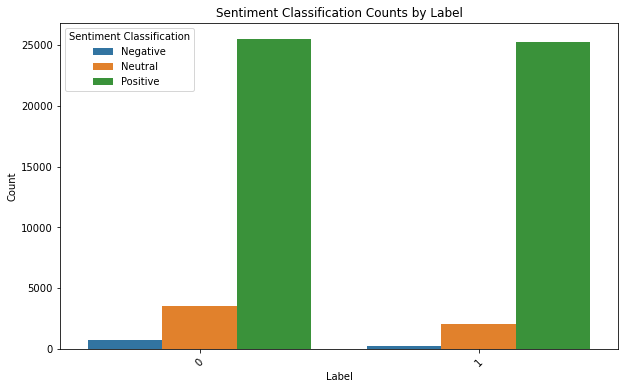

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'sub_df' is your DataFrame
# First, create a summary DataFrame that counts the occurrences of each sentiment classification within each label category
sentiment_counts = sub_df.groupby(['label', 'sentiment_classification']).size().unstack(fill_value=0).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Using seaborn to create a bar plot
sns.barplot(data=sentiment_counts.melt(id_vars=['label']), x='label', y='value', hue='sentiment_classification')

plt.title('Sentiment Classification Counts by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Sentiment Classification')
plt.xticks(rotation=45)  # Rotate labels if needed

plt.show()


In [13]:
sub_df["named_entities"]

0                               {'DATE': 1, 'CARDINAL': 1}
1        {'CARDINAL': 2, 'PERSON': 1, 'ORDINAL': 1, 'DA...
2        {'ORG': 7, 'PERSON': 5, 'GPE': 5, 'DATE': 2, '...
3                                                       {}
4        {'DATE': 3, 'ORG': 3, 'ORDINAL': 1, 'CARDINAL'...
                               ...                        
57286                                {'DATE': 2, 'GPE': 2}
57287                        {'CARDINAL': 2, 'ORDINAL': 2}
57288                                                   {}
57289                           {'CARDINAL': 1, 'DATE': 1}
57290                                          {'TIME': 1}
Name: named_entities, Length: 57291, dtype: object

In [14]:
import pandas as pd
from collections import defaultdict

# Initialize dictionaries to store aggregated counts
ai_counts = defaultdict(int)
student_counts = defaultdict(int)

# Iterate over the DataFrame to aggregate counts
for index, row in sub_df.iterrows():
    label = row['label']  # This assumes you have a 'label' column
    entities = row['named_entities']
    if label == 'fake':
        for key, value in entities.items():
            ai_counts[key] += value
    elif label == 'real':
        for key, value in entities.items():
            student_counts[key] += value

# Convert the aggregated counts into a DataFrame for easy plotting
ner_df = pd.DataFrame([ai_counts, student_counts], index=['AI', 'Student']).T.reset_index()
ner_df = ner_df.melt(id_vars='index', var_name='Label', value_name='Count')
ner_df.rename(columns={'index': 'NER_Tag'}, inplace=True)


In [15]:
import pandas as pd
from collections import defaultdict

# Initialize dictionaries to store aggregated counts for 'real' and 'fake'
real_counts = defaultdict(int)
fake_counts = defaultdict(int)

# Iterate over the DataFrame to aggregate counts based on 'name' column
for index, row in sub_df.iterrows():
    label = row['name']  # Using 'name' as the label column
    entities = row['named_entities']
    if label == 'real':
        for key, value in entities.items():
            real_counts[key] += value
    elif label == 'fake':
        for key, value in entities.items():
            fake_counts[key] += value

# Convert the aggregated counts into a DataFrame for plotting
ner_df = pd.DataFrame([real_counts, fake_counts], index=['Real', 'Fake']).T.reset_index()
ner_df = ner_df.melt(id_vars='index', var_name='Label', value_name='Count')
ner_df.rename(columns={'index': 'NER_Tag'}, inplace=True)


In [16]:
ner_df

,NER_Tag,Label,Count
0,CARDINAL,Real,60077
1,PERSON,Real,17011
2,ORDINAL,Real,18194
3,DATE,Real,65274
4,ORG,Real,26103
5,GPE,Real,29982
6,NORP,Real,8538
7,TIME,Real,8042
8,LOC,Real,5285
9,PERCENT,Real,9408


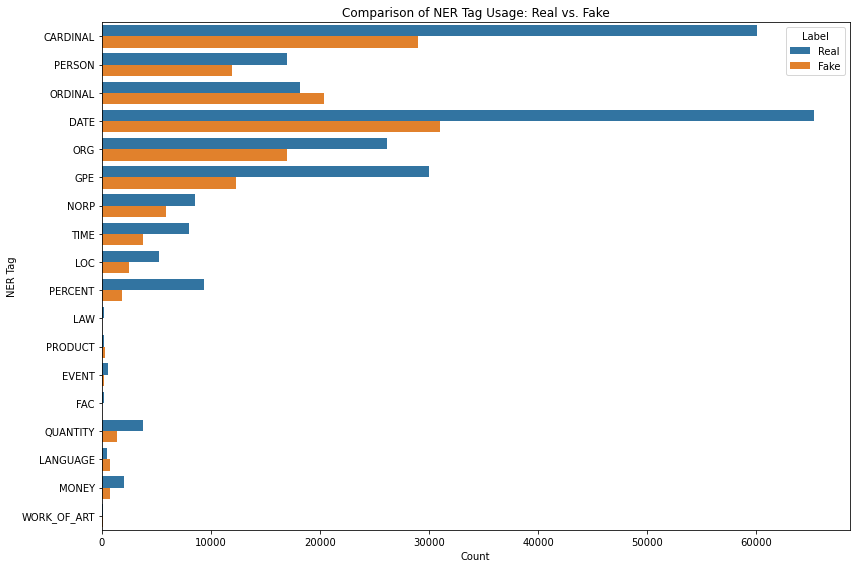

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='NER_Tag', hue='Label', data=ner_df, ci=None)

plt.title('Comparison of NER Tag Usage: Real vs. Fake')
plt.xlabel('Count')
plt.ylabel('NER Tag')
plt.legend(title='Label', loc='upper right')

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Ensure you have the necessary NLTK data downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to calculate punctuation percentage
def punctuation_percentage(text):
    punctuation_chars = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    punctuation_count = sum(1 for char in text if char in punctuation_chars)
    total_chars = len(text)
    if total_chars == 0:  # Avoid division by zero
        return 0
    return (punctuation_count / total_chars) * 100

# Function to count verbs
def verb_count(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    verb_tags = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
    verb_count = sum(1 for _, tag in tagged if tag in verb_tags)
    return verb_count

# Applying the functions to the 'cleaned_text' column
sub_df['punctuation_percentage'] = sub_df['cleaned_text'].apply(punctuation_percentage)
sub_df['verb_count'] = sub_df['cleaned_text'].apply(verb_count)


[nltk_data] Downloading package punkt to /home/rayapudi.s/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rayapudi.s/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


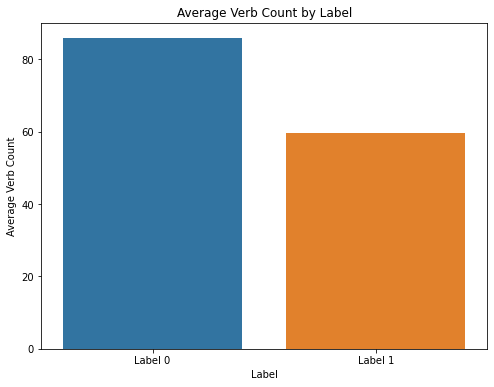

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate means
verb_count_means = sub_df.groupby('label')['verb_count'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='verb_count', data=verb_count_means)
plt.title('Average Verb Count by Label')
plt.xlabel('Label')
plt.ylabel('Average Verb Count')
plt.xticks([0, 1], ['Label 0', 'Label 1'])  # Adjust labels as per your dataset
plt.show()

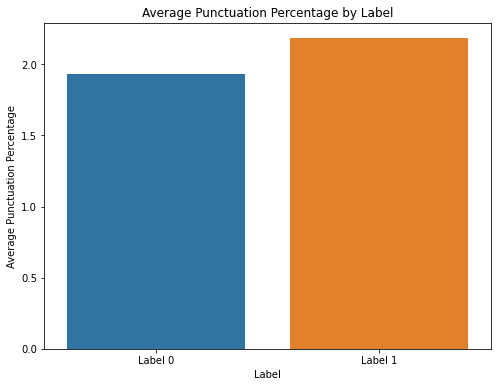

In [20]:
# Calculate means
punctuation_percentage_means = sub_df.groupby('label')['punctuation_percentage'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='punctuation_percentage', data=punctuation_percentage_means)
plt.title('Average Punctuation Percentage by Label')
plt.xlabel('Label')
plt.ylabel('Average Punctuation Percentage')
plt.xticks([0, 1], ['Label 0', 'Label 1'])  # Adjust labels as per your dataset
plt.show()


In [21]:
# Assuming sub_df is your DataFrame
# Convert the 'named_entities' column of dictionaries into a DataFrame of counts
entities_df = sub_df['named_entities'].apply(pd.Series).fillna(0)

# Now, entities_df has columns for each named entity type and rows for their counts
# You can merge this DataFrame back with your original DataFrame
sub_df = pd.concat([sub_df.drop(['named_entities'], axis=1), entities_df], axis=1)


In [22]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57291 entries, 0 to 57290
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   text                      57291 non-null  object 
 1   label                     57291 non-null  int64  
 2   name                      57291 non-null  object 
 3   cleaned_text              57291 non-null  object 
 4   sentence_length           57291 non-null  float64
 5   vocab_richness            57291 non-null  float64
 6   readability               57291 non-null  float64
 7   sentiment_polarity        57291 non-null  float64
 8   sentiment_subjectivity    57291 non-null  float64
 9   sentiment_classification  57291 non-null  object 
 10  punctuation_percentage    57291 non-null  float64
 11  verb_count                57291 non-null  int64  
 12  DATE                      57291 non-null  float64
 13  CARDINAL                  57291 non-null  float64
 14  PERSON

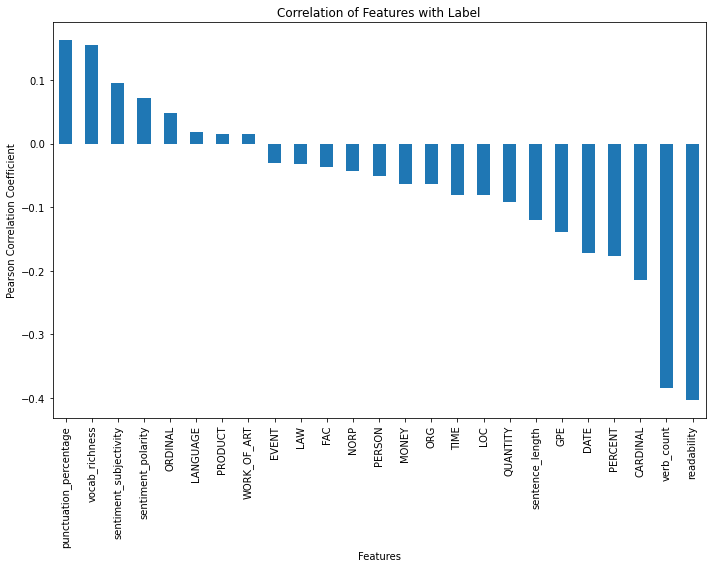

In [23]:
# Selecting numerical features excluding 'label'
numerical_features = sub_df.select_dtypes(include=[np.number]).drop('label', axis=1)
 
# Calculating Pearson correlation
correlation_with_label = numerical_features.apply(lambda x: x.corr(sub_df['label']))
 
# Visualizing the correlations
plt.figure(figsize=(10, 8))
correlation_with_label.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Label')
plt.ylabel('Pearson Correlation Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.feature_selection import f_classif
 
# Exclude non-numeric columns for ANOVA
X_anova = numerical_features
y_anova = sub_df['label']
 
# Perform ANOVA F-test
f_values, p_values = f_classif(X_anova, y_anova)
 
# Summarizing results
anova_results = pd.DataFrame({'Feature': X_anova.columns, 'F-value': f_values, 'P-value': p_values})
print(anova_results.sort_values(by='F-value', ascending=False))

                   Feature       F-value        P-value
2              readability  11144.618657   0.000000e+00
6               verb_count   9926.375113   0.000000e+00
8                 CARDINAL   2782.438048   0.000000e+00
16                 PERCENT   1859.603926   0.000000e+00
7                     DATE   1750.141541   0.000000e+00
5   punctuation_percentage   1555.077758   0.000000e+00
1           vocab_richness   1401.942676  3.721740e-303
12                     GPE   1129.948776  2.525827e-245
0          sentence_length    832.236064  1.063475e-181
4   sentiment_subjectivity    526.292731  6.042537e-116
21                QUANTITY    488.853456  7.169339e-108
15                     LOC    383.796955   3.529267e-85
14                    TIME    379.567615   2.899838e-84
3       sentiment_polarity    300.386812   4.027579e-67
11                     ORG    232.523932   2.128126e-52
22                   MONEY    228.159953   1.887518e-51
9                   PERSON    149.371753   2.624

In [25]:
# List of features to retain based on statistical significance and your selection
features_to_retain = [
    'verb_count',
    'vocab_richness',
    'GPE',
    'punctuation_percentage',
    'ORG',
    'CARDINAL',
    'DATE',
    'sentiment_polarity',
    'readability',
    'TIME', # 'sentence_length',removing sentence_length to check
    'sentiment_subjectivity',
    'cleaned_text',  # Including as specified
    'name',
    "label"# Including as specified
]
 
# Selecting only the specified columns from the DataFrame
sub_df_s = sub_df[features_to_retain]
 
# Now, 'sub_df_selected' contains only the columns of interest

In [26]:
def extract_named_entities_counts(text):
    doc = nlp(text)
    entities_counts = {'GPE': 0, 'ORG': 0, 'CARDINAL': 0, 'DATE': 0, 'TIME': 0}
    for ent in doc.ents:
        if ent.label_ in entities_counts:
            entities_counts[ent.label_] += 1
    return entities_counts

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
X = sub_df_s.drop(['label', 'name'], axis=1)
y = sub_df_s['label']
 
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Define the preprocessor and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['verb_count', 'vocab_richness', 'GPE', 'punctuation_percentage',
                                   'ORG', 'CARDINAL', 'DATE', 'sentiment_polarity', 'readability',
                                   'TIME', 'sentiment_subjectivity']),
        ('text', TfidfVectorizer(), 'cleaned_text')
    ])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [42]:
# Train the logistic regression model using the training data
pipeline_lr.fit(X_train, y_train)
 
# Predict and evaluate the model using the test data
y_pred_lr = pipeline_lr.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Logistic Regression Accuracy: 0.9871


In [47]:
# Prediction function for Logistic Regression
def predict_text_class_lr(text, pipeline_lr):
    # Preprocess the input text
    cleaned_text = clean_message(text)
 
    # Extract named entities counts
    entities_counts = extract_named_entities_counts(cleaned_text)
 
    # Generate additional features
    features = {
        'verb_count': verb_count(cleaned_text),
        'vocab_richness': vocabulary_richness(cleaned_text),
        'GPE': entities_counts.get('GPE', 0),
        'punctuation_percentage': punctuation_percentage(cleaned_text),
        'ORG': entities_counts.get('ORG', 0),
        'CARDINAL': entities_counts.get('CARDINAL', 0),
        'DATE': entities_counts.get('DATE', 0),
        'sentiment_polarity': TextBlob(cleaned_text).sentiment.polarity,
        'readability': textstat.flesch_reading_ease(cleaned_text),
        'TIME': entities_counts.get('TIME', 0),
        'sentence_length': sentence_length(cleaned_text),
        'sentiment_subjectivity': TextBlob(cleaned_text).sentiment.subjectivity,
        'cleaned_text': cleaned_text  # This is for TF-IDF transformation
    }
 
    # Create a DataFrame for the single observation
    features_df = pd.DataFrame([features])
 
    # Use the pipeline to predict the class
    predicted_class = pipeline_lr.predict(features_df)[0]
    
    # Map predicted class to labels
    if predicted_class == 0:
        return "Human written text"
    elif predicted_class == 1:
        return "AI generated text"


In [48]:
# Example usage:
text_example = ''' Dear Principle, I want to bring your attention to making students do community service. 
community service will teach the students how to be responsible, because they will have to be responsible for doing their community service, 
it will keep them out of trouble, because they have something else to do besides go to friends houses, and party, and they have something them, and their
family can be proud of because they made their own decision to help the community. Certainly, If you decide to make the students do community service, 
they will become more responsible. For example, the students will have to be on time to their community service job and that will help them to be on time 
to other things in life. They will also have to be responsible and make sure they help the community, and not forget to do their job, which is like a normal
kid doing homework in school. The student has to do their home work, and they can not forget. I think that community service will help them to also be more independent,
because they have to do their own duty of something like picking up trash on school property, and they will not be able to have help because
it is their own job. At home I am responsible for taking out the trash. That is my responsibility, even though it is the family trash. I take out the trash whenever it needs to be taken out, and I do not even get paid, just like a community service job. I do not always want to take out the trash but with community service, it shows me how if I am responsible I am not only helping myself, but the environment, and the people around me. Community service will also keep children out of trouble. Some students these days go to party's, and get grounded for several reasons. However, with community service the students will have something to do on their spare time which will lead to not getting in trouble, or being somewhere there not supposed to be. The students will have to be do the community service, but instead of being somewhere their parents can not contact them, they will be building a garden for a school, or helping little kids learn to read, Doesn't that sound better to you? If the students are feeling stressed out they know that they can attend to their community service job instead of doing something bad just to get the stress away. Of course the students could do a community service job with their friends, but the point is that they will be safe and doing something good for the community. Have you ever wanted to be the only subject at the diner table? The one your parents want to brag about to their friends? Well, I know I do. If you make the students do community service, their family would be so proud of them for stepping up and helping out. Maybe some kids do not do sports, so their parents do not have something to cheer at every weekend, but If a student came home to their family telling them how good they felt about doing community service that weekend, then the parents have something very special to cheer for. Parents of students want their children to do good in school, and if you consider making community service part of your school , then I am sure that you will be getting calls from parents saying thank-you for making my children do community service I am so proud and it has helped them so much. I know that if I helped out the community not only my parents would be proud, but I would be more than proud of myself. Keep in mind that Some of my friends have already started doing community service on their own, like tutoring elementary school children, and picking up liter on the streets, they told me that it has helped them so much,a nd I would like to be li Therefore, if you could get everyone in the school to do that then Don't forget it would make everyone have so much more responsibility, as well as they would stay out of trouble, and their family and them would be so proud. I think that it will change student is the most spectacular way, and I hope that you agree as well. Thank you, STUDENT_NAME '''
predicted_class = predict_text_class_lr(text_example,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [49]:
text_1= '''Most common societies expect students to identify a career by the age of 18 or 19. Personally, I think the best age to start figuring out a career path is as soon as one can. Young people are often faced with difficult decisions such as deciding which college to attend, or what job to pursue. When my parents gave me four years to decide on a career, I was overwhelmed and questioned if I was making the right decision. My advice to young people who are trying to figure out what career path to follow is to talk to mentors, explore different opportunities, and trust that you can make decisions that will help shape your future. '''
predicted_class = predict_text_class_lr(text_1,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [50]:
text_2= '''In recent years, technology has had a profound impact on our daily lives and the world around us. From staying connected with loved ones to ordering food online through an app, technology has made our lives easier and more convenient. However, with great
power comes great responsibility, and technology can also have negative consequences if used improperly.
 
One example of this is the spread of misinformation through the internet. It's easy to find articles and sources that may not be accurate or reliable, which can lead to confusion and even harm. Additionally, technology can also pose a threat to our privacy
and security if we are not careful about the websites and apps we use.
 
Despite these potential drawbacks, I believe that technology can be a powerful tool for achieving great things. For example, technology has revolutionized the way we learn and access information. With the internet, we can easily find resources and information
on any topic, making it easier to stay informed and up-to-date on current events.
 
Furthermore, technology has opened up new opportunities for collaboration and communication, allowing people from all over the world to work together and share ideas. This has led to many great achievements and innovations, and I believe that technology will
continue to play a vital role in shaping our future.
 
In conclusion, while technology has its drawbacks, I believe that its potential benefits far outweigh the risks. With responsible use and proper precautions, technology can be a powerful tool for achieving great things and improving our lives.
'''
predicted_class = predict_text_class_lr(text_2,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [51]:
text_3='''It may seem like a simple question, but there are actually many different answers to this question. Personally, I think that each student can benefit from joining in on an extracurricular. These may include clubs such as Soccer Club or Harry Potter Club, or maybe something like the school newspaper and Student Council. Each of these can provide a positive impact for every person who joins. I think that all students should participate in an extracurricular activity because they can help kids make and create new friendships, urge someone to develop a new skill, and encourage students to go outside of their comfort zone.
One way an extracurricular activity can benefit a student is by helping them to create new friendships, or maybe become closer with someone they normally wouldn't. For example, I have a friend who is a member of the Nintendo Club at our school. She is the only girl in the club, yet she has made new and unexpected friends through this experience. There are many different types of people who come together for these activities, so when a person joins in they can meet someone who has the same interests and hobbies. Unexpected friendships can be born through the simple action of attending an extracurricular.
A second positive outcome to participating in an extracurricular is the chance to develop a new skill. Another friend of mine loved to draw and write, but wasn't really a fan of sports. Recently, he decided to attend the Basketball Club and ended up loving it! He has continued to go to Basketball Club, and his skills have increased greatly. Although it may take some time, one can eventually develop a new and fun skill which they normally wouldn't have. Additionally, if someone has multiple skills and talents, that can increase their self esteem. A lot of students have insecurities and worry about not fitting in, however, when they gain a new skill this can boost the way they see themselves and increase their confidence.
The last way a student can benefit from participating in an extracurricular is by encouraging them to step outside of their comfort zone. I think that going outside of your comfort zone is something most people are not comfortable with doing, including myself. Over the summer, my brother switched soccer teams and this was very hard for him. Between having to leave his old team behind and adjusting to the new atmosphere, this new change was very difficult for him. As time went on, and he kept pushing himself outside of his comfort zone, and he had acclimated and adapted to the new environment. Now, my brother is so happy that he decided to go beyond what he was used to and loves his team. Even though this situation wasn't about an¬†extracurricular, they are both related. When a student joins a new club, they may be very nervous. But when someone makes the decision to try something new and take that scary step outside of their comfort zone, there will be many rewards in return. One of which is when people try new things, it can lead them to be successful in the future and inspire others to do the same thing.
To conclude, there are multiple benefits for a person who makes the choice to participate in an extracurricular. These include the chance to make new friends and meet new people, help students to develop a new skill, and urge someone to take a risk and go outside of their comfort zone. Although some may not want to try an extracurricular, it can impact them in so many positive ways. Should students participate in an extracurricular? I think yes, and if someone takes a risk and joins in on one, they might just think yes as well. '''
predicted_class = predict_text_class_lr(text_3,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [52]:
text_5 = '''A dictionary contains a definition of friendship somewhere in the F’s between the words “fear” and “Friday.” An encyclopedia supplies interesting facts on friendship. But all the definitions and facts do not convey what friendship is really all about. It cannot be understood through words or exaggerations. The only way to understand friendship is through experience. It is an experience that involves all the senses.
 
Friendship can be seen. It is seen in an old couple sitting in the park holding hands. It is the way they touch, a touch as light as a leaf floating in the autumn air, a touch so strong that years of living could not pull them apart. Friendship is seen in a child freely sharing the last cookie. It is the small arm over the shoulder of another as they walk on the playground. Seeing friendship is not casual. It is watching for subtlety, but friendship is there for eyes that can see.
 
Friendship can be heard. It is heard in the words of two friends who squeezed in lunch together on an extremely busy day. It is the way they talk to each other, not the words. Their tone is unique. Friendship can be heard by those willing to listen.
 
Friendship is felt in a touch. It is a pat on the back from a teammate, a high five between classes, the slimy, wet kiss from the family dog. It’s a touch that reassures that someone is there, someone who cares. The touch communicates more than words or gestures. It is instantly understood and speaks volumes beyond the point of contact, to the heart.
 
Friendship has a taste. It tastes like homemade bread, the ingredients all measured and planned, then carefully mixed and kneaded, then the quiet waiting as the dough rises. Hot from the oven, the bread tastes more than the sum of its ingredients. There is something else there, perhaps the thoughts of the baker as her hands knead the dough, or her patience as she waits for the dough to rise. Unseen and unmeasured, this is the ingredient that makes the difference. Warm, fresh from the oven with a little butter, the difference you taste is friendship.
 
Friendship has a smell. It smells like the slightly burnt cookies your brother made especially for you. It smells like your home when stepping into it after being away for a long time. It smells like a sandbox or a sweaty gym. Friendship has a variety of smells. Taken for granted at the moment, they define the memory of friendship.
 
Finally, more than the other senses, friendship is an experience of the heart. It is the language of the heart—a language without words, vowels, or consonants; a language that, whether seen, felt, heard, or tasted, is understood by the heart. Like air fills the lungs, friendship fills the heart, allowing us to experience the best life has to offer: a friend.'''
predicted_class = predict_text_class_lr(text_5,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [53]:
text_6 = '''It was a beautiful August morning. The sun was brightly shining on my sunglasses while my mother drove the U-haul truck to a warehouse in Santa Ana, California. As my mother drove down the streets of Santa Ana, I looked out the window and began to realize that the mixture of people was no longer a mixture; there was only white.
 
When we arrived at the warehouse, I had to peel my arm off the side of the hot door like a burnt sausage off a skillet. There were not many cars in the parking lot, and I could see the heat waves. As we walked up the boiling pavement, it felt like we were walking through a scorching desert. When we walked into the warehouse, there was a variety of electronic appliances to choose from, and about three-fourths of them were white (of course).
 
About every 15 minutes, a salesperson followed us around and asked if we needed help, as if we were retarded or ex-cons. My mother really dislikes it when salespersons constantly ask if we need help; she feels if she needs their help, she’ll ask for it. Finally, after about two and a half boring hours of looking for any scratches or marks on the dryers and refrigerators that might fit best in our new apartment, my mother picked a dryer and refrigerator that were just right. She then let the salesperson know, and he replied with a smile, “All right, you can pick up your items in the back in about five minutes.” My mother said, “Thank you,” in a nice, friendly voice and walked across the scorched pavement to drive the truck to the back.
 
When we got to the back, there were about three open spaces for picking up appliances. My mother chose the first parking spot she saw, which was by a white family’s car. Then she showed the employees the receipt for the appliances she had just bought. They said, “All right, we’ll be with you in just a minute.” While I waited for my mother, I looked over and smiled at the white lady in the next car, but instead of smiling back like a nice young woman, she frowned at me like I had something hanging from my nose. At first I thought, “Well, maybe she is having a bad day.” Then a few minutes later the people working at the warehouse started to look at my mother and me in a mean way. Then I figured that maybe something was on my face, but when I looked in the mirror, I saw nothing. At the time, I had only spent nine years and some months on this planet. I didn’t know racism was still around; I thought that situation had died along with Dr. King.
 
Five minutes passed, then ten, then fifteen. We sat there watching people get their appliances and leave. We seemed invisible to them. As I sat in the car, burning up and listening to one of the most boring radio stations my mother could possibly like, I was thinking, “We’d better leave or else I’ll go ballistic!” After 30 minutes had passed, my mother got frustrated and politely asked to have our items loaded. Five more minutes passed, and she asked again with an attitude. They replied, “We’ll be with you in a minute, ma’am.” I could tell she was beginning to get upset because she started to get that “don’t bother me” look. Five minutes later they finally packed our appliances on the truck.
 
When we left the warehouse, I described to my mother what the other people were doing. She explained, “They were racist. They didn’t like us because we have different skin color.”
 
That was my first encounter with racism. It was just a small slice of reality—that everyone isn’t going to be as nice as you, your friends, and your family might be; and that just because you look nice and politely smile at others, it doesn’t mean that others will treat you the same. This situation made me feel very out of place and confused. I didn’t expect those people to react as they did. We are all civilized, intelligent, caring, peaceful people . . . or at least that is what I had believed.
 
'''
predicted_class = predict_text_class_lr(text_6,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [54]:
text_9 = '''In Autumn's embrace, leaves whisper to the ground,
A tapestry of gold, red, and brown unfound.
Beneath the crisp air, a quiet transformation,
As nature prepares for winter's long vacation.
'''
predicted_class = predict_text_class_lr(text_9,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [55]:
text_4 = '''The environment encompasses the natural world, serving as a vital foundation for life on Earth. It's a complex web of ecosystems, where plants, animals, and microorganisms interact with the physical elements around them, from vast oceans and dense forests to arid deserts and towering mountains. Human activities, however, have placed unprecedented pressure on these natural systems, leading to climate change, loss of biodiversity, and pollution that threatens the delicate balance required for survival. Recognizing the urgent need for sustainability, societies worldwide are increasingly adopting green technologies and conservation practices, aiming to restore and protect the environment for future generations. This collective effort towards environmental stewardship highlights the deep connection between humans and the natural world, underscoring the importance of preserving our planet's health and diversity.'''
predicted_class = predict_text_class_lr(text_4,pipeline_lr)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


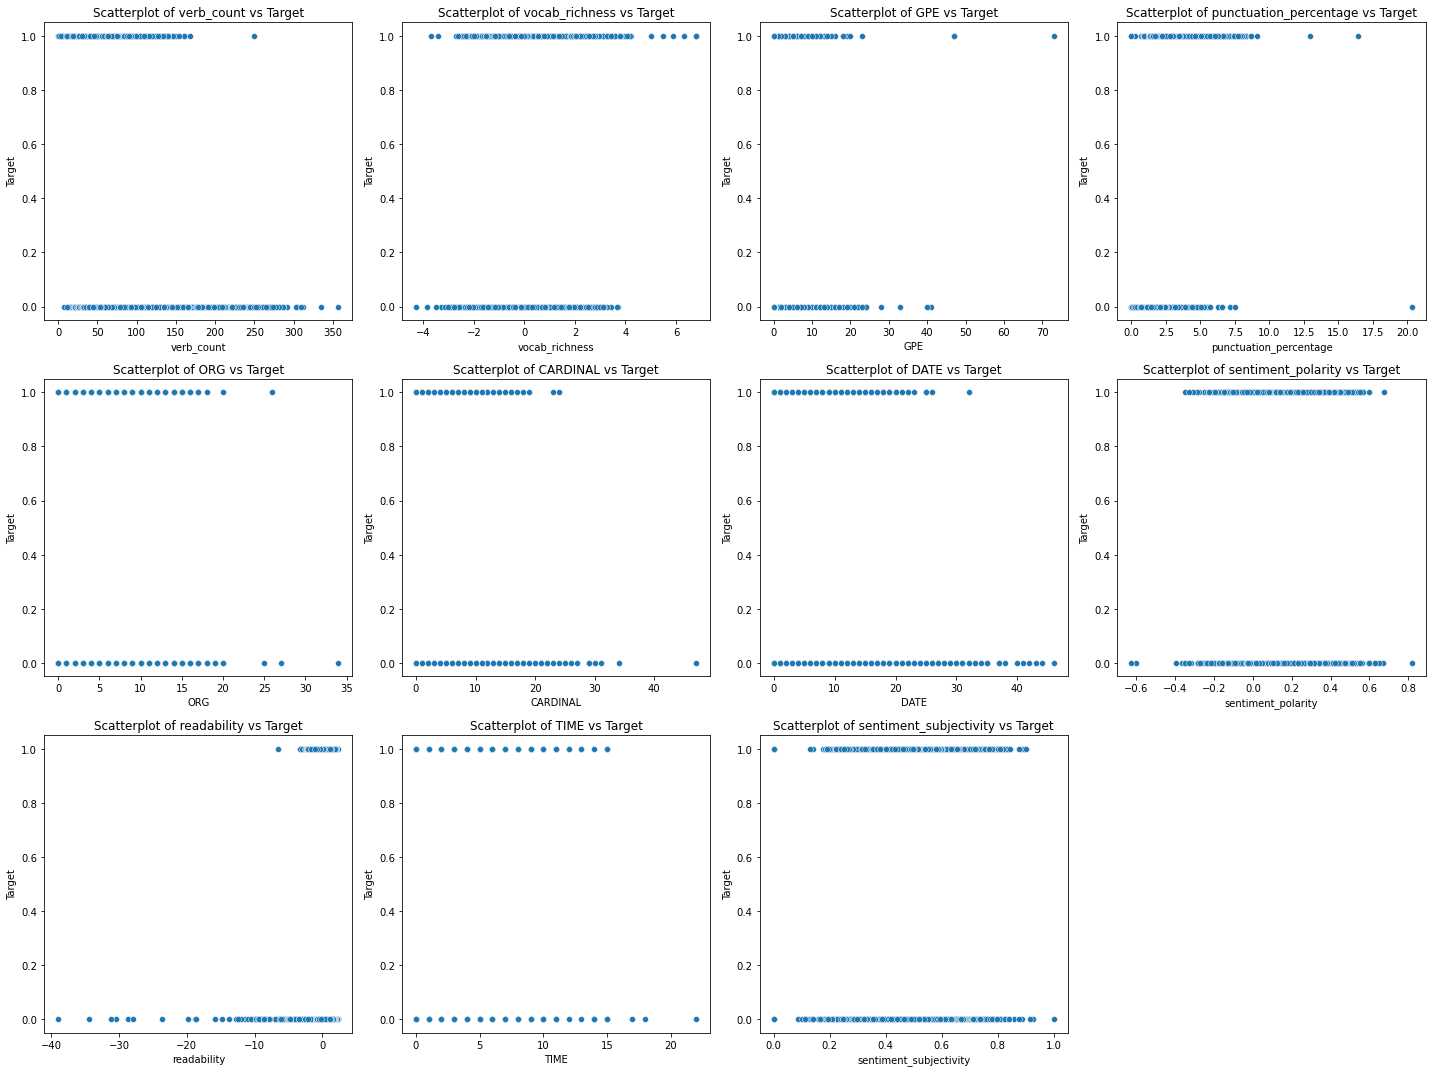

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplots for each numerical feature against the target variable
numerical_features = ['verb_count', 'vocab_richness', 'GPE', 'punctuation_percentage',
                      'ORG', 'CARDINAL', 'DATE', 'sentiment_polarity', 'readability',
                      'TIME', 'sentiment_subjectivity']

# Calculate the number of rows needed
num_rows = (len(numerical_features) + 3) // 4  # Round up to the nearest integer

# Set up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot scatterplots
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=X_train[feature], y=y_train, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

# Hide unused subplots
for j in range(len(numerical_features), num_rows * 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [74]:
# Train the Random Forest model using the training data
pipeline_rf.fit(X_train, y_train)
 
# Predict and evaluate the model using the test data
y_pred_rf = pipeline_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Accuracy: 0.9803


In [75]:
# Prediction function
def predict_text_class_rf(text, pipeline_rf):
    # Preprocess the input text
    cleaned_text = clean_message(text)
 
    # Extract named entities counts
    entities_counts = extract_named_entities_counts(cleaned_text)
 
    # Generate additional features
    features = {
        'verb_count': verb_count(cleaned_text),
        'vocab_richness': vocabulary_richness(cleaned_text),
        'GPE': entities_counts.get('GPE', 0),
        'punctuation_percentage': punctuation_percentage(cleaned_text),
        'ORG': entities_counts.get('ORG', 0),
        'CARDINAL': entities_counts.get('CARDINAL', 0),
        'DATE': entities_counts.get('DATE', 0),
        'sentiment_polarity': TextBlob(cleaned_text).sentiment.polarity,
        'readability': textstat.flesch_reading_ease(cleaned_text),
        'TIME': entities_counts.get('TIME', 0),
        'sentence_length': sentence_length(cleaned_text),
        'sentiment_subjectivity': TextBlob(cleaned_text).sentiment.subjectivity,
        'cleaned_text': cleaned_text  # This is for TF-IDF transformation
    }
 
    # Create a DataFrame for the single observation
    features_df = pd.DataFrame([features])
 
    # Use the pipeline to predict the class
    predicted_class = pipeline_rf.predict(features_df)[0]
    
    # Map predicted class to labels
    if predicted_class == 0:
        return "Human written text"
    elif predicted_class == 1:
        return "AI generated text"


In [76]:
# Example usage:
text_example = ''' Dear Principle, I want to bring your attention to making students do community service. 
community service will teach the students how to be responsible, because they will have to be responsible for doing their community service, 
it will keep them out of trouble, because they have something else to do besides go to friends houses, and party, and they have something them, and their
family can be proud of because they made their own decision to help the community. Certainly, If you decide to make the students do community service, 
they will become more responsible. For example, the students will have to be on time to their community service job and that will help them to be on time 
to other things in life. They will also have to be responsible and make sure they help the community, and not forget to do their job, which is like a normal
kid doing homework in school. The student has to do their home work, and they can not forget. I think that community service will help them to also be more independent,
because they have to do their own duty of something like picking up trash on school property, and they will not be able to have help because
it is their own job. At home I am responsible for taking out the trash. That is my responsibility, even though it is the family trash. I take out the trash whenever it needs to be taken out, and I do not even get paid, just like a community service job. I do not always want to take out the trash but with community service, it shows me how if I am responsible I am not only helping myself, but the environment, and the people around me. Community service will also keep children out of trouble. Some students these days go to party's, and get grounded for several reasons. However, with community service the students will have something to do on their spare time which will lead to not getting in trouble, or being somewhere there not supposed to be. The students will have to be do the community service, but instead of being somewhere their parents can not contact them, they will be building a garden for a school, or helping little kids learn to read, Doesn't that sound better to you? If the students are feeling stressed out they know that they can attend to their community service job instead of doing something bad just to get the stress away. Of course the students could do a community service job with their friends, but the point is that they will be safe and doing something good for the community. Have you ever wanted to be the only subject at the diner table? The one your parents want to brag about to their friends? Well, I know I do. If you make the students do community service, their family would be so proud of them for stepping up and helping out. Maybe some kids do not do sports, so their parents do not have something to cheer at every weekend, but If a student came home to their family telling them how good they felt about doing community service that weekend, then the parents have something very special to cheer for. Parents of students want their children to do good in school, and if you consider making community service part of your school , then I am sure that you will be getting calls from parents saying thank-you for making my children do community service I am so proud and it has helped them so much. I know that if I helped out the community not only my parents would be proud, but I would be more than proud of myself. Keep in mind that Some of my friends have already started doing community service on their own, like tutoring elementary school children, and picking up liter on the streets, they told me that it has helped them so much,a nd I would like to be li Therefore, if you could get everyone in the school to do that then Don't forget it would make everyone have so much more responsibility, as well as they would stay out of trouble, and their family and them would be so proud. I think that it will change student is the most spectacular way, and I hope that you agree as well. Thank you, STUDENT_NAME '''
predicted_class = predict_text_class_rf(text_example,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [77]:
text_1= '''Most common societies expect students to identify a career by the age of 18 or 19. Personally, I think the best age to start figuring out a career path is as soon as one can. Young people are often faced with difficult decisions such as deciding which college to attend, or what job to pursue. When my parents gave me four years to decide on a career, I was overwhelmed and questioned if I was making the right decision. My advice to young people who are trying to figure out what career path to follow is to talk to mentors, explore different opportunities, and trust that you can make decisions that will help shape your future. '''
predicted_class = predict_text_class_rf(text_1,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: AI generated text


In [78]:
text_2= '''In recent years, technology has had a profound impact on our daily lives and the world around us. From staying connected with loved ones to ordering food online through an app, technology has made our lives easier and more convenient. However, with great
power comes great responsibility, and technology can also have negative consequences if used improperly.
 
One example of this is the spread of misinformation through the internet. It's easy to find articles and sources that may not be accurate or reliable, which can lead to confusion and even harm. Additionally, technology can also pose a threat to our privacy
and security if we are not careful about the websites and apps we use.
 
Despite these potential drawbacks, I believe that technology can be a powerful tool for achieving great things. For example, technology has revolutionized the way we learn and access information. With the internet, we can easily find resources and information
on any topic, making it easier to stay informed and up-to-date on current events.
 
Furthermore, technology has opened up new opportunities for collaboration and communication, allowing people from all over the world to work together and share ideas. This has led to many great achievements and innovations, and I believe that technology will
continue to play a vital role in shaping our future.
 
In conclusion, while technology has its drawbacks, I believe that its potential benefits far outweigh the risks. With responsible use and proper precautions, technology can be a powerful tool for achieving great things and improving our lives.
'''
predicted_class = predict_text_class_rf(text_2,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: AI generated text


In [79]:
text_3='''It may seem like a simple question, but there are actually many different answers to this question. Personally, I think that each student can benefit from joining in on an extracurricular. These may include clubs such as Soccer Club or Harry Potter Club, or maybe something like the school newspaper and Student Council. Each of these can provide a positive impact for every person who joins. I think that all students should participate in an extracurricular activity because they can help kids make and create new friendships, urge someone to develop a new skill, and encourage students to go outside of their comfort zone.
One way an extracurricular activity can benefit a student is by helping them to create new friendships, or maybe become closer with someone they normally wouldn't. For example, I have a friend who is a member of the Nintendo Club at our school. She is the only girl in the club, yet she has made new and unexpected friends through this experience. There are many different types of people who come together for these activities, so when a person joins in they can meet someone who has the same interests and hobbies. Unexpected friendships can be born through the simple action of attending an extracurricular.
A second positive outcome to participating in an extracurricular is the chance to develop a new skill. Another friend of mine loved to draw and write, but wasn't really a fan of sports. Recently, he decided to attend the Basketball Club and ended up loving it! He has continued to go to Basketball Club, and his skills have increased greatly. Although it may take some time, one can eventually develop a new and fun skill which they normally wouldn't have. Additionally, if someone has multiple skills and talents, that can increase their self esteem. A lot of students have insecurities and worry about not fitting in, however, when they gain a new skill this can boost the way they see themselves and increase their confidence.
The last way a student can benefit from participating in an extracurricular is by encouraging them to step outside of their comfort zone. I think that going outside of your comfort zone is something most people are not comfortable with doing, including myself. Over the summer, my brother switched soccer teams and this was very hard for him. Between having to leave his old team behind and adjusting to the new atmosphere, this new change was very difficult for him. As time went on, and he kept pushing himself outside of his comfort zone, and he had acclimated and adapted to the new environment. Now, my brother is so happy that he decided to go beyond what he was used to and loves his team. Even though this situation wasn't about an¬†extracurricular, they are both related. When a student joins a new club, they may be very nervous. But when someone makes the decision to try something new and take that scary step outside of their comfort zone, there will be many rewards in return. One of which is when people try new things, it can lead them to be successful in the future and inspire others to do the same thing.
To conclude, there are multiple benefits for a person who makes the choice to participate in an extracurricular. These include the chance to make new friends and meet new people, help students to develop a new skill, and urge someone to take a risk and go outside of their comfort zone. Although some may not want to try an extracurricular, it can impact them in so many positive ways. Should students participate in an extracurricular? I think yes, and if someone takes a risk and joins in on one, they might just think yes as well. '''
predicted_class = predict_text_class_rf(text_3,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [80]:
text_5 = '''A dictionary contains a definition of friendship somewhere in the F’s between the words “fear” and “Friday.” An encyclopedia supplies interesting facts on friendship. But all the definitions and facts do not convey what friendship is really all about. It cannot be understood through words or exaggerations. The only way to understand friendship is through experience. It is an experience that involves all the senses.
 
Friendship can be seen. It is seen in an old couple sitting in the park holding hands. It is the way they touch, a touch as light as a leaf floating in the autumn air, a touch so strong that years of living could not pull them apart. Friendship is seen in a child freely sharing the last cookie. It is the small arm over the shoulder of another as they walk on the playground. Seeing friendship is not casual. It is watching for subtlety, but friendship is there for eyes that can see.
 
Friendship can be heard. It is heard in the words of two friends who squeezed in lunch together on an extremely busy day. It is the way they talk to each other, not the words. Their tone is unique. Friendship can be heard by those willing to listen.
 
Friendship is felt in a touch. It is a pat on the back from a teammate, a high five between classes, the slimy, wet kiss from the family dog. It’s a touch that reassures that someone is there, someone who cares. The touch communicates more than words or gestures. It is instantly understood and speaks volumes beyond the point of contact, to the heart.
 
Friendship has a taste. It tastes like homemade bread, the ingredients all measured and planned, then carefully mixed and kneaded, then the quiet waiting as the dough rises. Hot from the oven, the bread tastes more than the sum of its ingredients. There is something else there, perhaps the thoughts of the baker as her hands knead the dough, or her patience as she waits for the dough to rise. Unseen and unmeasured, this is the ingredient that makes the difference. Warm, fresh from the oven with a little butter, the difference you taste is friendship.
 
Friendship has a smell. It smells like the slightly burnt cookies your brother made especially for you. It smells like your home when stepping into it after being away for a long time. It smells like a sandbox or a sweaty gym. Friendship has a variety of smells. Taken for granted at the moment, they define the memory of friendship.
 
Finally, more than the other senses, friendship is an experience of the heart. It is the language of the heart—a language without words, vowels, or consonants; a language that, whether seen, felt, heard, or tasted, is understood by the heart. Like air fills the lungs, friendship fills the heart, allowing us to experience the best life has to offer: a friend.'''
predicted_class = predict_text_class_rf(text_5,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [81]:
text_6 = '''It was a beautiful August morning. The sun was brightly shining on my sunglasses while my mother drove the U-haul truck to a warehouse in Santa Ana, California. As my mother drove down the streets of Santa Ana, I looked out the window and began to realize that the mixture of people was no longer a mixture; there was only white.
 
When we arrived at the warehouse, I had to peel my arm off the side of the hot door like a burnt sausage off a skillet. There were not many cars in the parking lot, and I could see the heat waves. As we walked up the boiling pavement, it felt like we were walking through a scorching desert. When we walked into the warehouse, there was a variety of electronic appliances to choose from, and about three-fourths of them were white (of course).
 
About every 15 minutes, a salesperson followed us around and asked if we needed help, as if we were retarded or ex-cons. My mother really dislikes it when salespersons constantly ask if we need help; she feels if she needs their help, she’ll ask for it. Finally, after about two and a half boring hours of looking for any scratches or marks on the dryers and refrigerators that might fit best in our new apartment, my mother picked a dryer and refrigerator that were just right. She then let the salesperson know, and he replied with a smile, “All right, you can pick up your items in the back in about five minutes.” My mother said, “Thank you,” in a nice, friendly voice and walked across the scorched pavement to drive the truck to the back.
 
When we got to the back, there were about three open spaces for picking up appliances. My mother chose the first parking spot she saw, which was by a white family’s car. Then she showed the employees the receipt for the appliances she had just bought. They said, “All right, we’ll be with you in just a minute.” While I waited for my mother, I looked over and smiled at the white lady in the next car, but instead of smiling back like a nice young woman, she frowned at me like I had something hanging from my nose. At first I thought, “Well, maybe she is having a bad day.” Then a few minutes later the people working at the warehouse started to look at my mother and me in a mean way. Then I figured that maybe something was on my face, but when I looked in the mirror, I saw nothing. At the time, I had only spent nine years and some months on this planet. I didn’t know racism was still around; I thought that situation had died along with Dr. King.
 
Five minutes passed, then ten, then fifteen. We sat there watching people get their appliances and leave. We seemed invisible to them. As I sat in the car, burning up and listening to one of the most boring radio stations my mother could possibly like, I was thinking, “We’d better leave or else I’ll go ballistic!” After 30 minutes had passed, my mother got frustrated and politely asked to have our items loaded. Five more minutes passed, and she asked again with an attitude. They replied, “We’ll be with you in a minute, ma’am.” I could tell she was beginning to get upset because she started to get that “don’t bother me” look. Five minutes later they finally packed our appliances on the truck.
 
When we left the warehouse, I described to my mother what the other people were doing. She explained, “They were racist. They didn’t like us because we have different skin color.”
 
That was my first encounter with racism. It was just a small slice of reality—that everyone isn’t going to be as nice as you, your friends, and your family might be; and that just because you look nice and politely smile at others, it doesn’t mean that others will treat you the same. This situation made me feel very out of place and confused. I didn’t expect those people to react as they did. We are all civilized, intelligent, caring, peaceful people . . . or at least that is what I had believed.
 
'''
predicted_class = predict_text_class_rf(text_6,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [82]:
text_9 = '''In Autumn's embrace, leaves whisper to the ground,
A tapestry of gold, red, and brown unfound.
Beneath the crisp air, a quiet transformation,
As nature prepares for winter's long vacation.
'''
predicted_class = predict_text_class_rf(text_9,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: AI generated text


In [83]:
text_4 = '''The environment encompasses the natural world, serving as a vital foundation for life on Earth. It's a complex web of ecosystems, where plants, animals, and microorganisms interact with the physical elements around them, from vast oceans and dense forests to arid deserts and towering mountains. Human activities, however, have placed unprecedented pressure on these natural systems, leading to climate change, loss of biodiversity, and pollution that threatens the delicate balance required for survival. Recognizing the urgent need for sustainability, societies worldwide are increasingly adopting green technologies and conservation practices, aiming to restore and protect the environment for future generations. This collective effort towards environmental stewardship highlights the deep connection between humans and the natural world, underscoring the importance of preserving our planet's health and diversity.'''
predicted_class = predict_text_class_rf(text_4,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: AI generated text


In [84]:
text_7 = '''To: Heidi Larson
 
Dear Dr. Larson:
 
Your accountant, Rusty Silhacek, is my neighbor. He mentioned that your office stays very busy, so I wondered if you could use some extra help. I would like to apply for a position as a part-time veterinary assistant.
 
As far as animal care goes, I’m experienced in feeding, bathing, exercising, and cleaning up after small and large animals. I truly love animals and have always given them special attention and care. I would be available to help after school and on weekends.
 
I would be happy to come in for an interview at your convenience. You can contact me any weekday after 3:00 p.m. at 523-4418. Thank you for considering my application.
 
Sincerely,
 
Andrea Rodriguez'''
predicted_class = predict_text_class_rf(text_7,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [85]:
text_8 = '''Something happens inside of me when I listen to the music of the Counting Crows. Raw, uncensored emotion pours from the mouth of lead singer Adam Duritz. His voice seems to naturally synthesize with the background music of guitars, pianos, organs, drums, and accordions.
 
When Adam sings, it’s as if he’s ripped open his chest and is exposing his heart and all of its contents, regardless of the cost, because that’s how much his emotions mean to him.
 
The words of Adam’s self-written songs (lyrics and piano music) can speak to anybody and convey a vivid mental picture of the mood present in the music. The band’s music and Adam’s lyrics are best described in the following quote from Ean, a fan from www.annabegins.com:
 
Take autumn, with all its leaves falling off of the trees, and the green turning to gold . . . and then the sodden brown of winter, the coming chill in the air, the sudden clarity of the moon at night, the aching melancholy felt as summer rolls away behind you, and the world of winter wraps itself around you. If you could take all of this, and all that it means and suggests, and turn it into music, you would have the Counting Crows.
 
Adam Duritz was born in Baltimore, Maryland, but lived in Boston, Denver, and Dallas before settling down with his family in San Francisco. Before leading the Crows, Adam was an English major at the University of California at Davis and at Berkeley in the late ’80s. He quit school without turning in his thesis because he thought that it wasn’t very good. Between the time he dropped out of school and formed the band, Adam worked a wide array of jobs, getting fired from each one.
 
An insomniac, Adam has had plenty of idle time to be productive. He claims that his inability to sleep is due to his uneasiness about letting go of consciousness. He says he can’t allow himself to do it. During sleepless nights, Adam’s true poetic genius takes over. He just lets himself go, pouring onto paper thoughts about his past relationships and other memories.
 
Any avid listener will notice that a few recurring metaphors are present in Adam’s songs: that memories are ghosts and relationships are trains. The first of these two metaphors is pretty self-explanatory; however, the second needs some explanation. Adam believes that getting into a realtionship is similar to boarding a train and riding to a final destination with the other person. He feels that in order to be in a relationship, one must be willing and able to live with the other person’s ghosts.
 
It’s quite a beautiful concept about the trains. In his song “Ghost Train,” Adam sings, “Love is like a ghost train rumbling through the darkness. Remember everything when only memory remains.” Love carries us away with another person, building memories together and taking us to a common destination.
 
Another characteristic that an avid Crows listener will notice is that Adam often sings about particular women. There’s Maria, Elizabeth, Amy, Anna, Shannon, Amanda, Lisa, and Margery, just to name a few. The two who appear most frequently in Adam’s lyrics are Maria and Elizabeth. Adam has said in interviews that Maria is like the female version of himself. He uses this fictional character in his songs when he wants to express his thoughts but not make it apparent that the song is about him. (However, he has said that most of his songs are about him or his experiences because that’s all he knows.) Elizabeth is an ex-girlfriend of Adam’s. They were a couple when the Crows caught their first true glimpse of fame. Elizabeth was in college at the time that Adam was on the road touring. She was obsessed with the fear that Adam was cheating on her (which he claims he wasn’t). As in most cases, the long-distance relationship didn’t work out.
 
Adam comments that the breakup was for the best; however, his songs including Elizabeth indicate otherwise. The song “I Wish I Was a Girl” on the album This Desert Life is about Adam’s desire to make Elizabeth realize that he was faithful to her during the time that he was away. There’s a double standard when girls say that they were faithful and they’re generally believed, but when guys say it, nobody believes them. Another song, “Goodnight Elizabeth,” from the album Recovering the Satellites is Adam’s lullaby dedicated to Elizabeth. The lyrics basically express that Adam will always carry a piece of Elizabeth with him. The lyrics say, “I wish you were inside of me/I hope that you’re OK/I hope you’re resting quietly/I just wanted to say/Goodnight, Elizabeth, goodnight.” He says "goodnight" instead of "goodbye."
 
He refers to himself as the king of the rain in a few songs, much like Jim Morrison is also known as the Lizard King. I’ve tried to figure out what this rain symbolism means, and my hypothesis is that rain could mean tears or just a bad situation. Possibly he feels that he inadvertently causes a lot of problems for the people he cares about. As he sings in the song “Chelsea,” “The things I do to people I love just shouldn’t be allowed.” As much as he needs others, he may not be good for them.
 
He is quite absorbed in his own feelings, which is sometimes interpreted as egotism, but I get the impression that he’s unsure of his true identity and doesn’t really believe in himself. Since he is very sensitive and constantly searching his soul, he’s become infatuated with his own feelings. He’s absorbed in feelings, and I think that people have interpreted that infatuation as egotism.
 
Adam’s poetic lyrics move me to the depths of my soul. With just a few words and the emotion in his voice, he can make me feel as if there is a starry summer night inside of me . . . or a lonely, empty hotel room. There is nostalgia behind his lyrics and a canvas painted with love, loneliness, devotion, and disappointment.
 
During the production of the band’s first album, Adam’s most important goal was to “make a mark upon the world.” If it’s worth anything, he’s made more than just a mark upon my world; he has painted me a sky and filled it with stars.'''
predicted_class = predict_text_class_rf(text_8,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text


In [86]:
text_9 = '''In statistics, we generally want to study a population. You can think of a population as a collection of persons, things, or objects under study. To study the population, we select a sample. The idea of sampling is to select a portion (or subset) of the larger population and study that portion (the sample) to gain information about the population. Data are the result of sampling from a population.
Because it takes a lot of time and money to examine an entire population, sampling is a very practical technique. If you wished to compute the overall grade point average at your school, it would make sense to select a sample of students who attend the school. The data collected from the sample would be the students' grade point averages.'''
predicted_class = predict_text_class_rf(text_9,pipeline_rf)
print(f"The predicted class is: {predicted_class}")

The predicted class is: Human written text
